# Wine Classification

Data set: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset which is a copy of https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

In [1]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from helpers import f1_score_impl

In [3]:
random_state = 42

In [4]:
np.random.seed(random_state)

In [5]:
%matplotlib inline

In [6]:
plt.rcParams.update({'font.size': 14, 'figure.figsize': (20,9)})

In [7]:
data_dict = load_wine(return_X_y=False, as_frame=True)

In [8]:
data_dict['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
df_data = data_dict['data']
df_target = data_dict['target']
df = df_data.copy(deep=True)
df['class']=data_dict['target'].map(lambda ind: data_dict['target'][ind])
df['target_name']=data_dict['target'].map(lambda ind: data_dict['target_names'][ind])

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [10]:
len(df_data.columns)

13

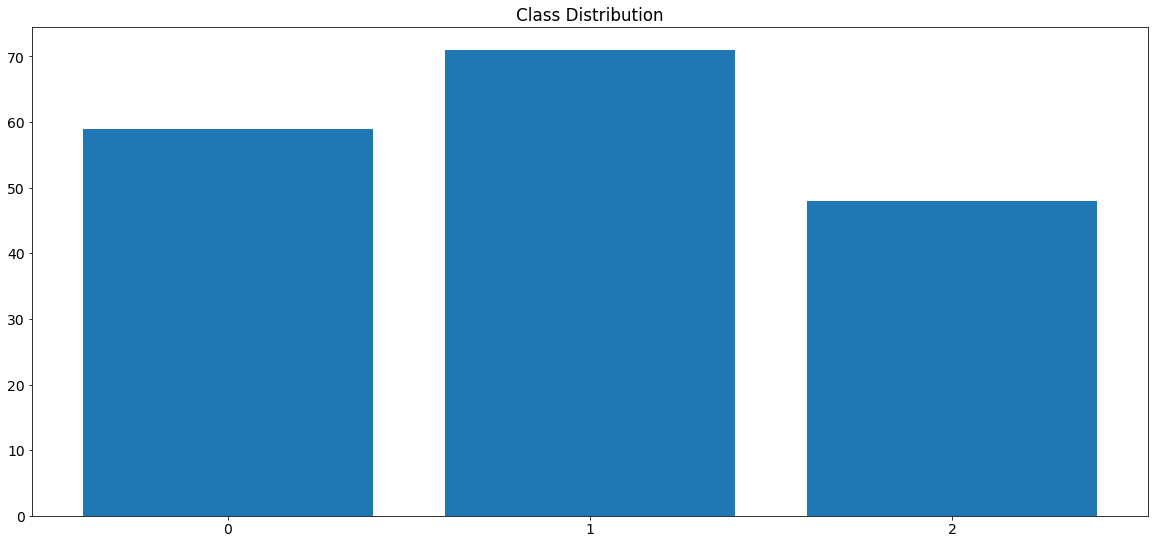

In [11]:
plt.bar(df_target.value_counts().index, df_target.value_counts())
plt.xticks([0, 1, 2])
plt.title('Class Distribution')
plt.show()

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data.to_numpy())

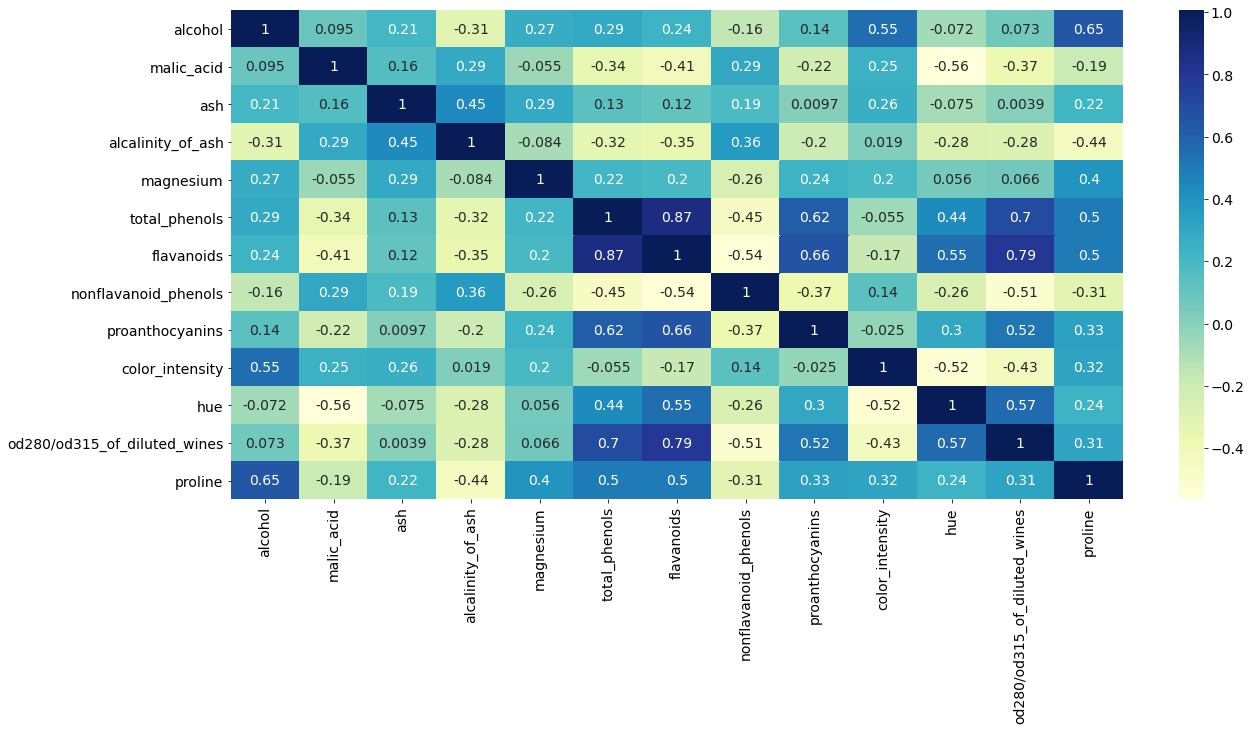

In [13]:
cov_m = np.cov(scaled_data, rowvar=False)
sns.heatmap(cov_m, annot=True, xticklabels=df_data.columns, yticklabels=df_data.columns, cmap='YlGnBu')
plt.show()

### Correlation above +/-0.6
alcohol:
* proline

total_phenols:
* flavanoids 
* proanthocyanins
* od280/od315_of_diluted_wines

flavanoids:
* total_phenols
* proanthocyanins
* od280/od315_of_diluted_wines

proanthocyanins:
* total_phenols
* flavanoids

od280/od315_of_diluted_wines:
* total_phenols
* flavanoids

proline:
* alcohol

Drop: proline, flavanoids, proanthocyanins, od280/od315_of_diluted_wines

In [14]:
df_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [15]:
df_data_mod = df_data.drop(['proline', 'flavanoids', 'proanthocyanins', 'od280/od315_of_diluted_wines'], axis=1)

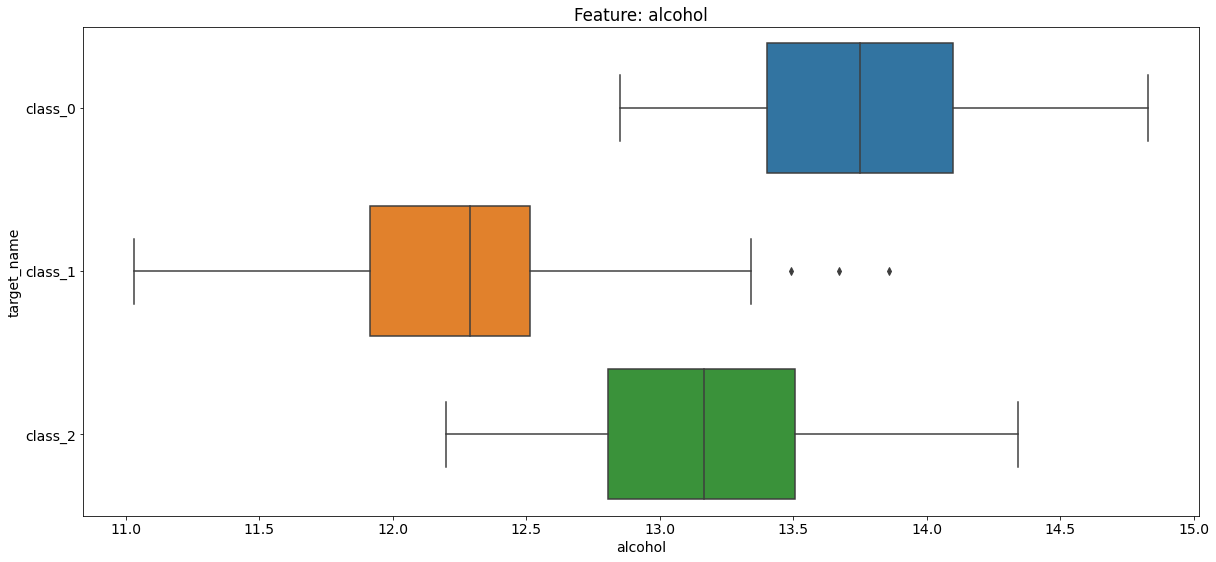

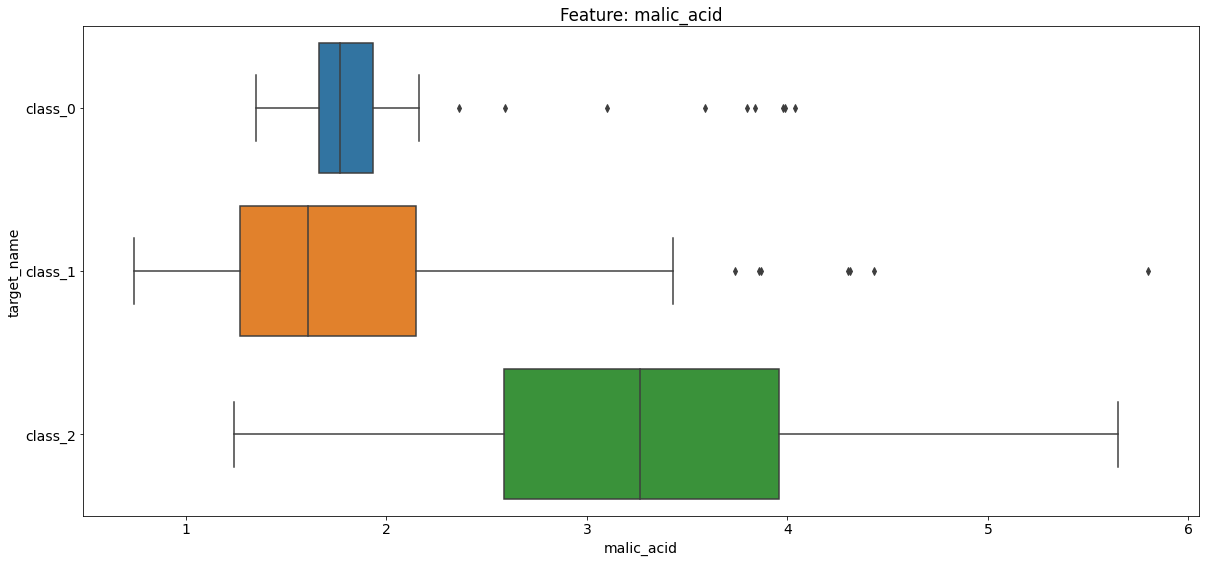

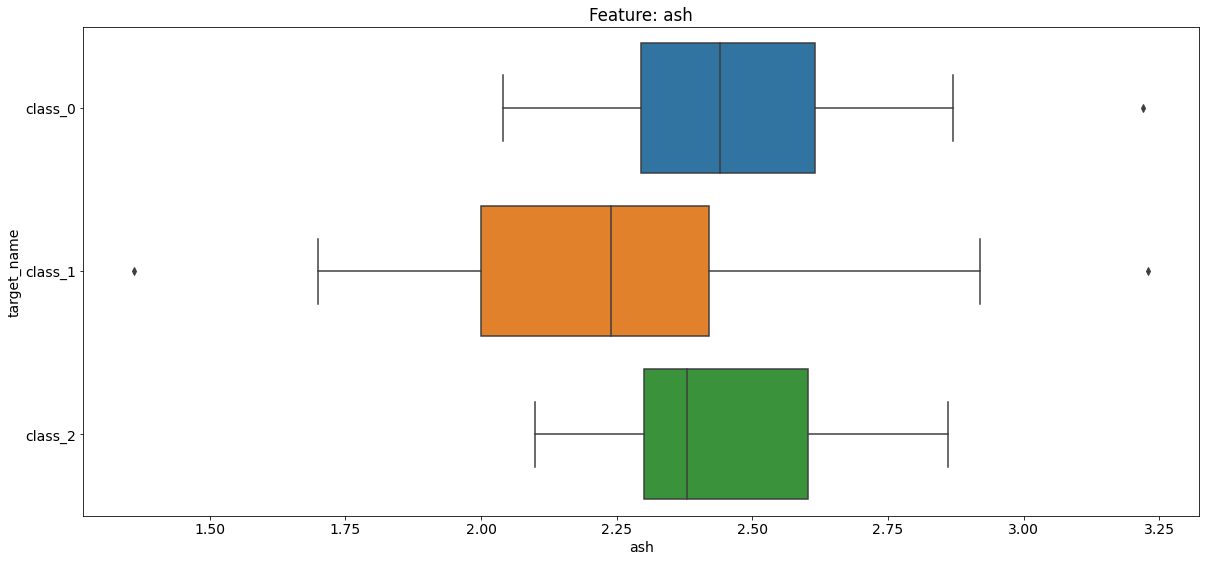

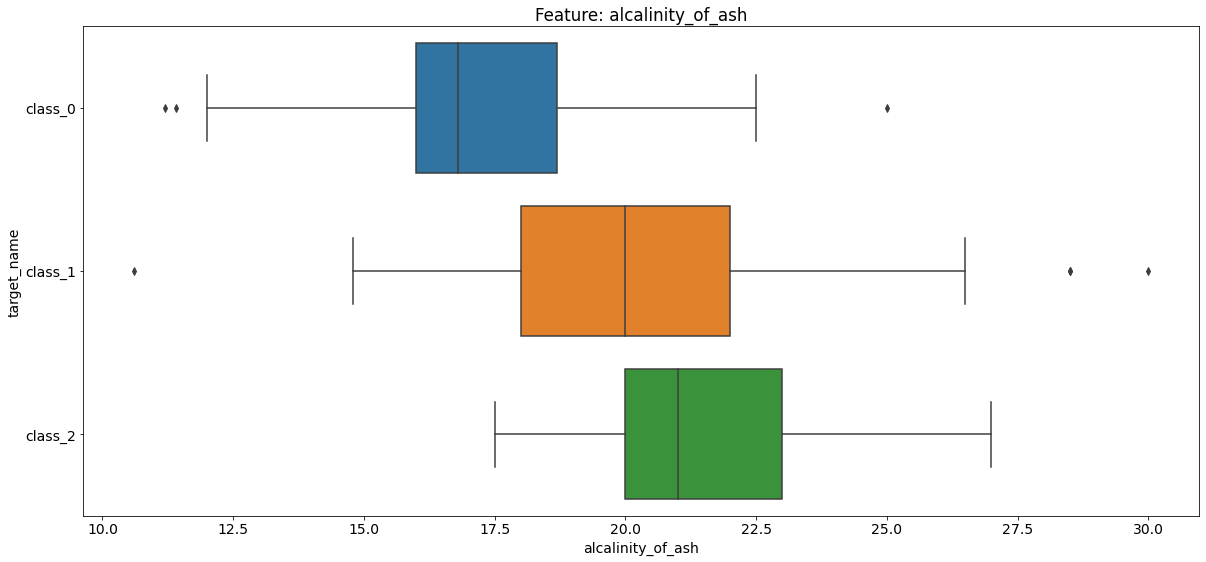

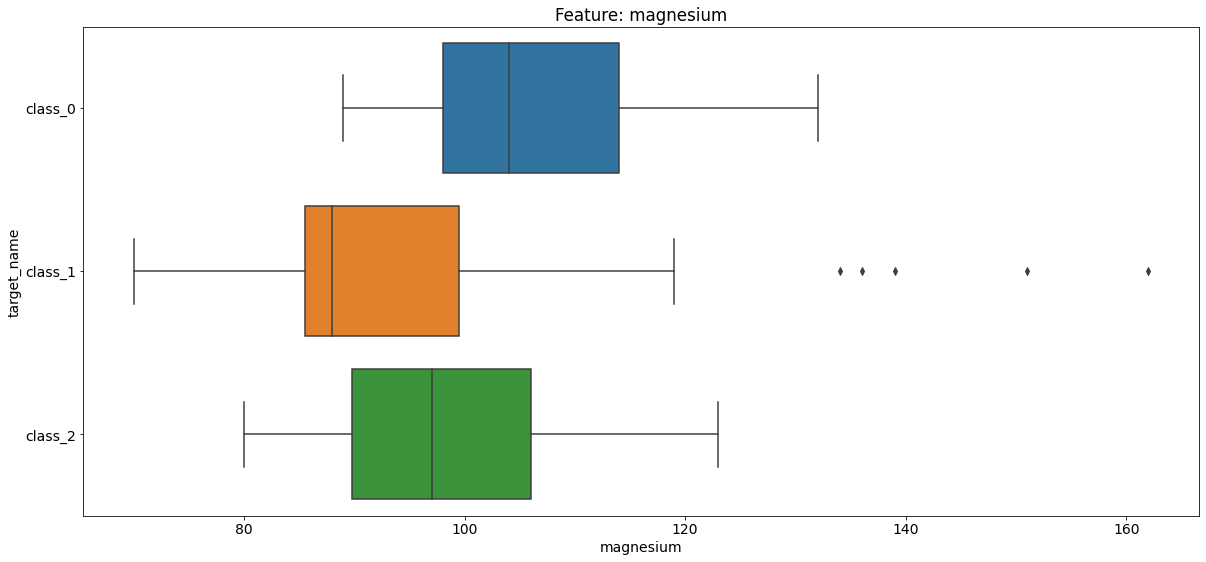

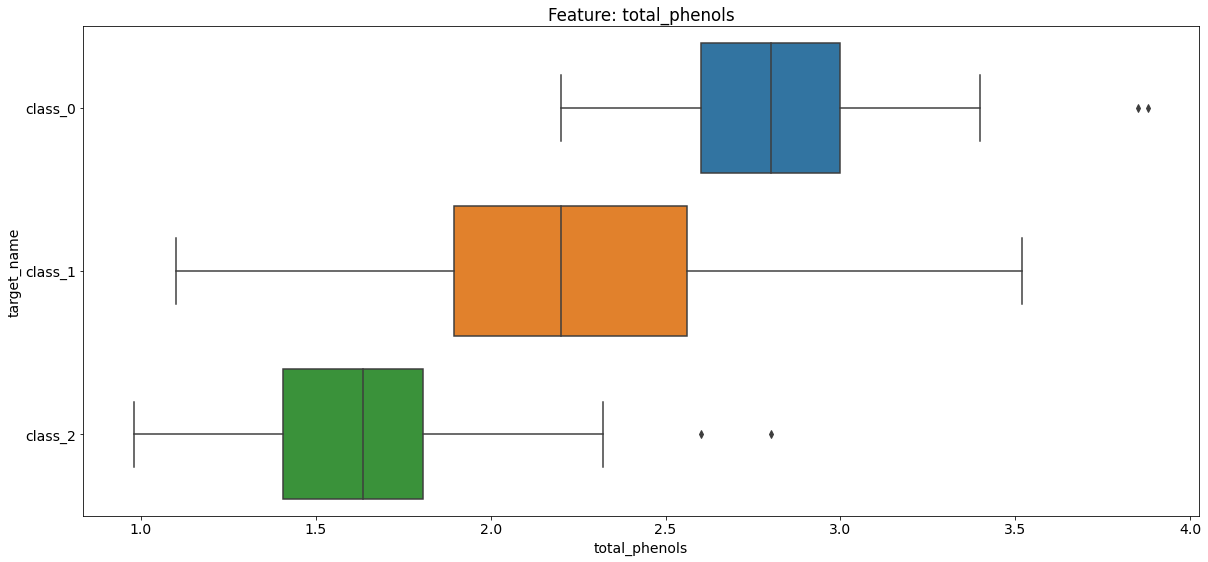

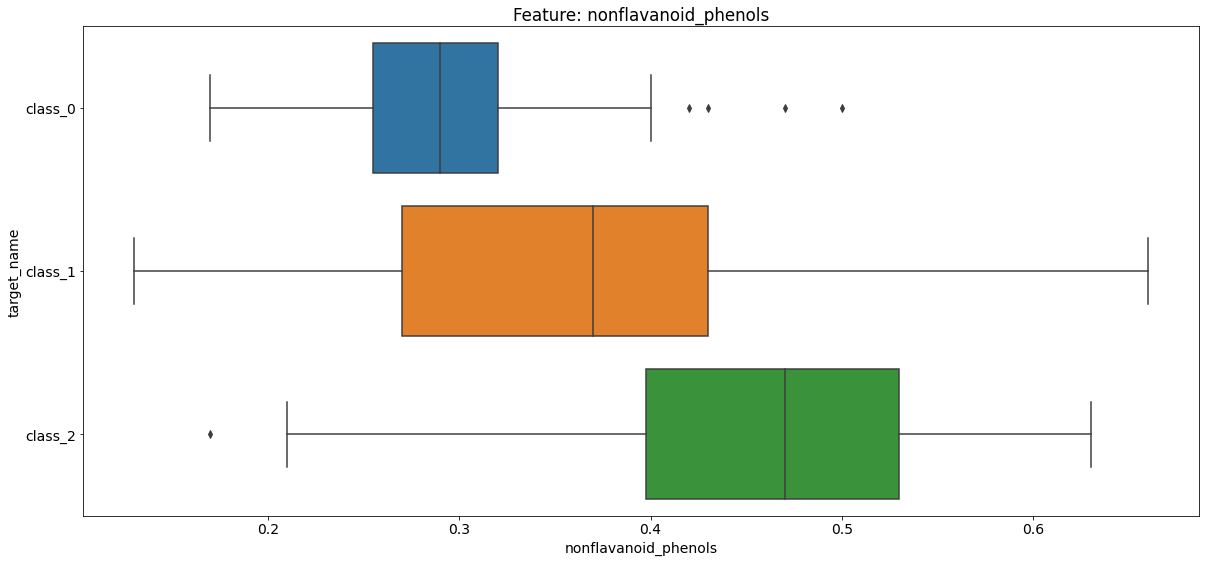

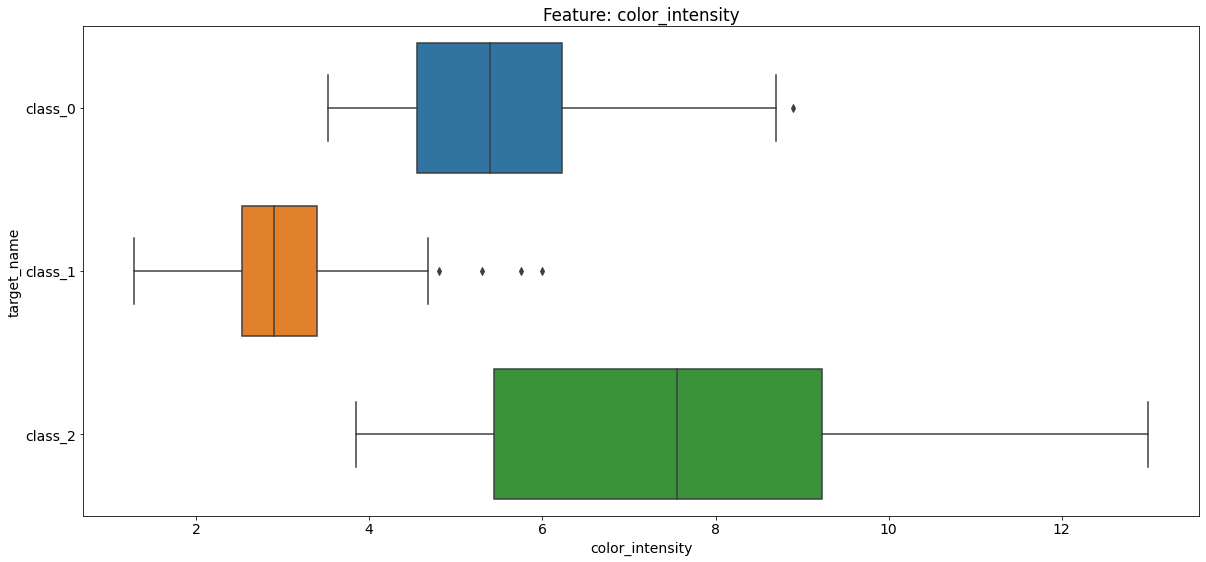

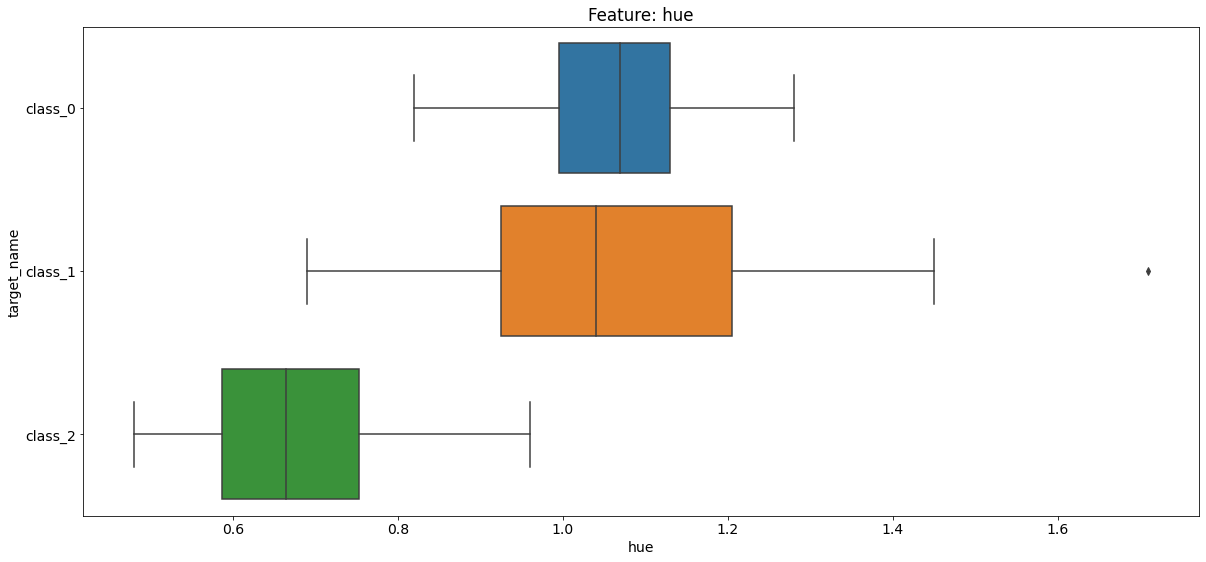

In [16]:
for feature in df_data_mod.columns:
    gs1 = gridspec.GridSpec(1,1)
    ax1 = plt.subplot(gs1[0])
    sns.boxplot(x=feature, y='target_name', data=df, ax=ax1)
    ax1.set_title('Feature: {}'.format(feature))
    plt.show()

In [17]:
df_data_mod.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'nonflavanoid_phenols', 'color_intensity', 'hue'],
      dtype='object')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_data_mod.to_numpy(),
                                                    df_target.to_numpy(),
                                                    test_size=0.33,
                                                    random_state=random_state)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=2, random_state=random_state)
rf.fit(X_train_scaled, y_train)
print('Result (9 features): {}'.format(rf.score(X_test_scaled, y_test)))

Result (9 features): 0.8813559322033898


In [21]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = df_data_mod.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.style.background_gradient(cmap='YlGnBu', low=0.1, high=0.2)

,importance
color_intensity,0.337680
total_phenols,0.212487
hue,0.143838
alcohol,0.093769
malic_acid,0.063928
magnesium,0.051852
nonflavanoid_phenols,0.041785
alcalinity_of_ash,0.037277
ash,0.017384


In [22]:
df_data_mod.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'nonflavanoid_phenols', 'color_intensity', 'hue'],
      dtype='object')

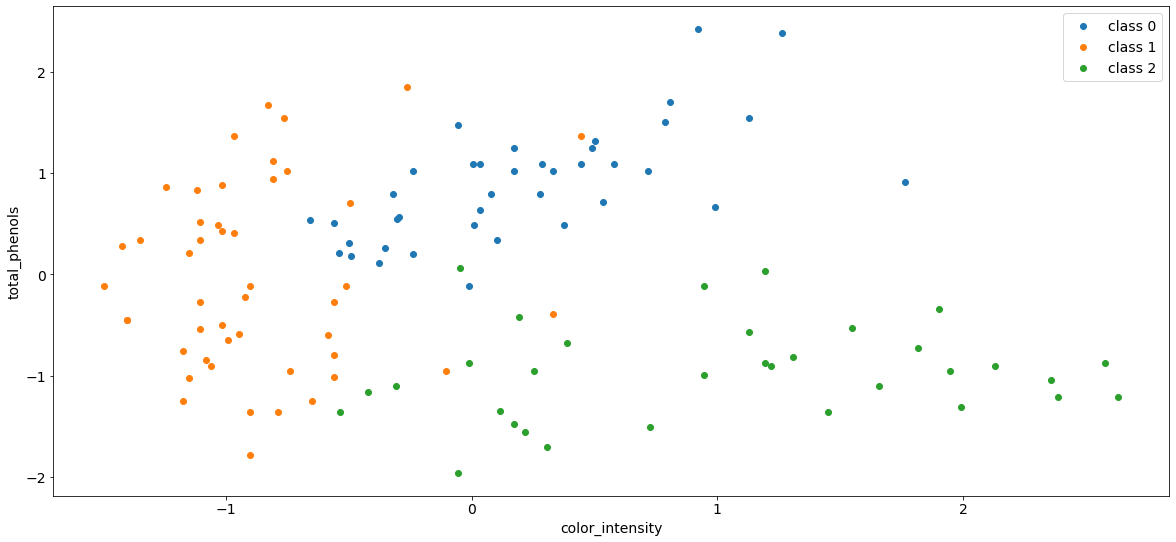

In [23]:
plt.scatter(X_train_scaled[np.where(y_train==0)[0], df_data_mod.columns.get_loc('color_intensity')], X_train_scaled[np.where(y_train==0)[0], df_data_mod.columns.get_loc('total_phenols')], label='class 0')
plt.scatter(X_train_scaled[np.where(y_train==1)[0], df_data_mod.columns.get_loc('color_intensity')], X_train_scaled[np.where(y_train==1)[0], df_data_mod.columns.get_loc('total_phenols')], label='class 1')
plt.scatter(X_train_scaled[np.where(y_train==2)[0], df_data_mod.columns.get_loc('color_intensity')], X_train_scaled[np.where(y_train==2)[0], df_data_mod.columns.get_loc('total_phenols')], label='class 2')
plt.xlabel('color_intensity')
plt.ylabel('total_phenols')
plt.legend()
plt.show()

In [24]:
clf = RandomForestClassifier(n_estimators=10, max_depth=3, n_jobs=2, random_state=random_state)
clf.fit(X_train_scaled[:, [df_data_mod.columns.get_loc('color_intensity'), df_data_mod.columns.get_loc('total_phenols')] ], y_train)
print('Result (2 features): {}'.format(clf.score(X_test_scaled[:, [df_data_mod.columns.get_loc('color_intensity'),
                                                                   df_data_mod.columns.get_loc('total_phenols')] ], y_test)))

Result (2 features): 0.864406779661017


In [25]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = ['color_intensity', 'total_phenols'], columns=['importance']).sort_values('importance', ascending=False)
feature_importances.style.background_gradient(cmap='YlGnBu', low=0.1, high=0.2)

,importance
color_intensity,0.554294
total_phenols,0.445706


### Training Set

In [26]:
unique, counts = np.unique(y_train, return_counts=True)

print('Number of labels:\n{}'.format(np.asarray((unique, counts)).T))

Number of labels:
[[ 0 39]
 [ 1 47]
 [ 2 33]]


In [27]:
y_preds = clf.predict(X_train_scaled[:, [df_data_mod.columns.get_loc('color_intensity'), df_data_mod.columns.get_loc('total_phenols')] ])

The training set is a bit unbalanced.

Therefore, compute F1-Score and the confusion matrix.

The F1-Score is given by

\begin{align}
    F1-Score = \frac{2TP}{2TP + FP + FN}
\end{align}

where $TP$ are the true positive, $FP$ the false positive and $FN$ the false negative. In contrast, the accuracy is given by

\begin{align}
    Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{align}

providing the over all performance of a model.


In [28]:
print('F1-Scores: {}'.format(f1_score_impl(y_train, y_preds)))

F1-Scores: [0.95       0.94382022 0.95652174]


In [29]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       1.00      0.89      0.94        47
           2       0.92      1.00      0.96        33

    accuracy                           0.95       119
   macro avg       0.95      0.96      0.95       119
weighted avg       0.95      0.95      0.95       119



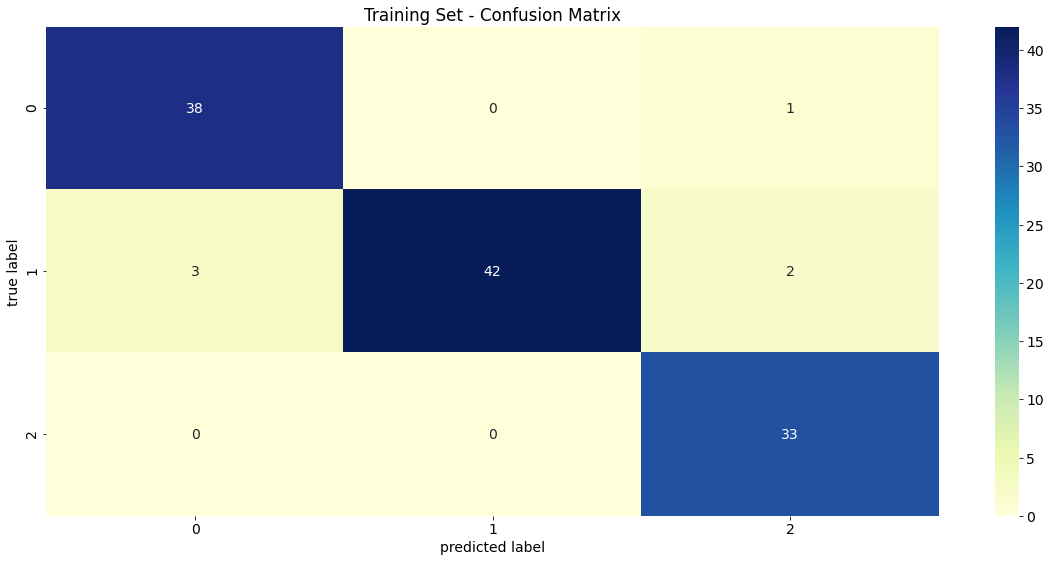

In [30]:
sns.heatmap(confusion_matrix(y_train, y_preds), annot=True, cmap='YlGnBu')
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.title('Training Set - Confusion Matrix')
plt.show()

### Test Set

In [31]:
unique, counts = np.unique(y_test, return_counts=True)

print('Number of labels:\n{}'.format(np.asarray((unique, counts)).T))

Number of labels:
[[ 0 20]
 [ 1 24]
 [ 2 15]]


In [32]:
y_preds = clf.predict(X_test_scaled[:, [df_data_mod.columns.get_loc('color_intensity'), df_data_mod.columns.get_loc('total_phenols')] ])

In [33]:
print('F1-Scores: {}'.format(f1_score_impl(y_test, y_preds)))

F1-Scores: [0.86363636 0.86363636 0.86666667]


In [34]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.95      0.79      0.86        24
           2       0.87      0.87      0.87        15

    accuracy                           0.86        59
   macro avg       0.87      0.87      0.86        59
weighted avg       0.88      0.86      0.86        59



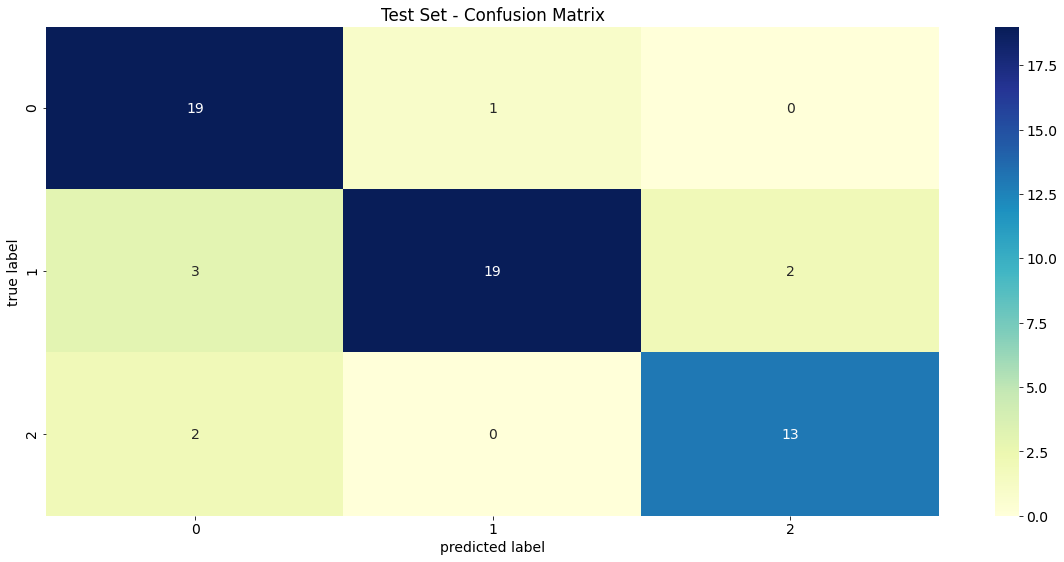

In [35]:
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='YlGnBu')
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.title('Test Set - Confusion Matrix')
plt.show()